# Task 1

C:\Users\Predrag\AppData\Local\Temp\ipykernel_3228\305030625.py:24: RuntimeWarning: divide by zero encountered in scalar divide
  alpha = min(1, target_distribution(*proposed_point) / target_distribution(*current_point))


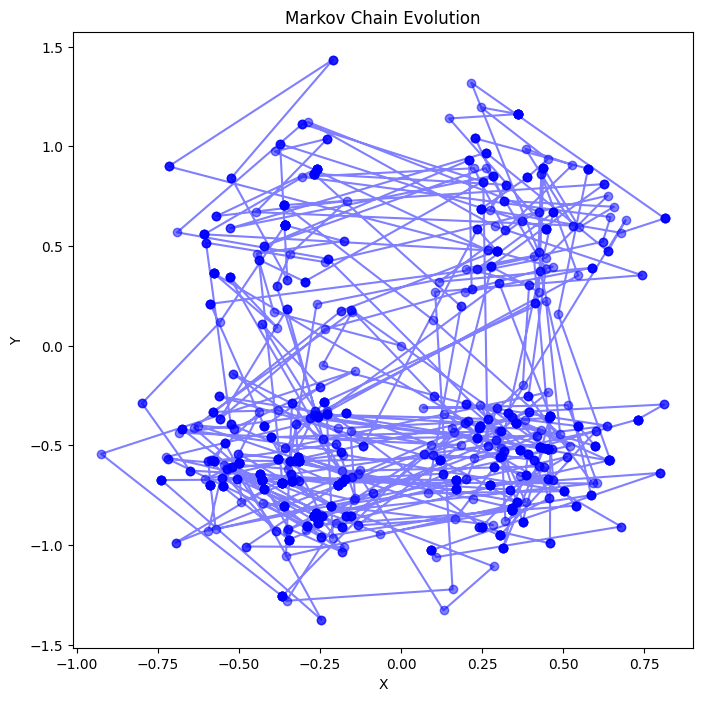

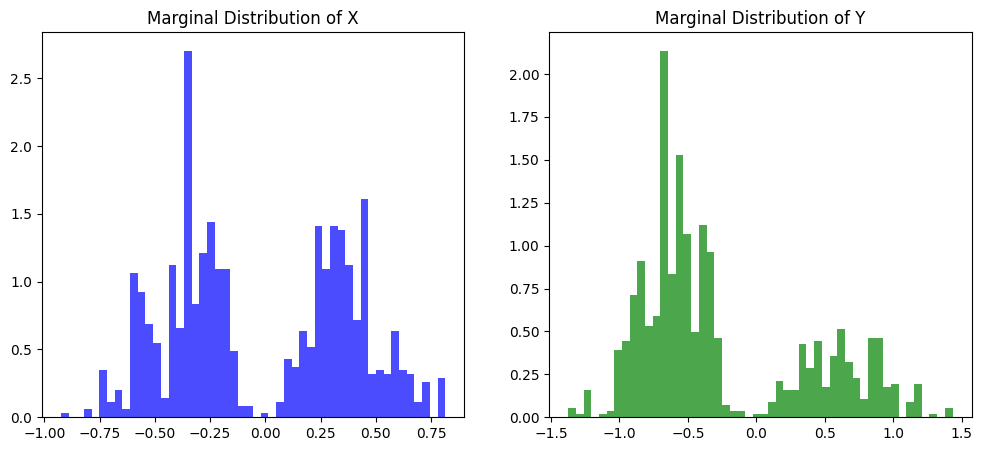

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Target distribution
def target_distribution(x, y):
    return (np.sin(x * y)**2 * np.cos(-x * y)**2 * np.exp(-8 * x**2 - 2 * np.abs(y)**3))

# Proposal density (Gaussian with mean = x)
def proposal_density(x, sigma):
    z = x + np.random.normal(0, sigma, size=2)
    return z

# Metropolis-Hastings algorithm with proposal dependent only on the difference
def metropolis_hastings(iterations, initial_point, sigma):
    chain = np.zeros((iterations, 2))
    # Initial point is at 0, 0
    chain[0, :] = initial_point

    for i in range(1, iterations):
        current_point = chain[i - 1, :]
        proposed_point = proposal_density(current_point, sigma)

        # Acceptance probability
        alpha = min(1, target_distribution(*proposed_point) / target_distribution(*current_point))

        # Accept or reject
        if np.random.uniform() < alpha:
            chain[i, :] = proposed_point
        else:
            chain[i, :] = current_point

    return chain

# Visualize the evolution of the Markov chain
def plot_chain_evolution(chain):
    plt.figure(figsize=(8, 8))
    plt.plot(chain[:, 0], chain[:, 1], marker='o', linestyle='-', color='b', alpha=0.5)
    plt.title('Markov Chain Evolution')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

# Visualize marginal distributions of X and Y using histograms
def plot_marginal_histograms(chain):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.hist(chain[:, 0], bins=50, density=True, color='blue', alpha=0.7)
    plt.title('Marginal Distribution of X')

    plt.subplot(1, 2, 2)
    plt.hist(chain[:, 1], bins=50, density=True, color='green', alpha=0.7)
    plt.title('Marginal Distribution of Y')

    plt.show()

# Parameters
iterations = 1000
initial_point = np.array([0, 0])
sigma = 0.5

# Run Metropolis-Hastings algorithm
chain = metropolis_hastings(iterations, initial_point, sigma)

# Visualize results
plot_chain_evolution(chain)
plot_marginal_histograms(chain)

In [2]:
chain = np.zeros((iterations, 2))
chain[0, :]

array([0., 0.])

# Task 2

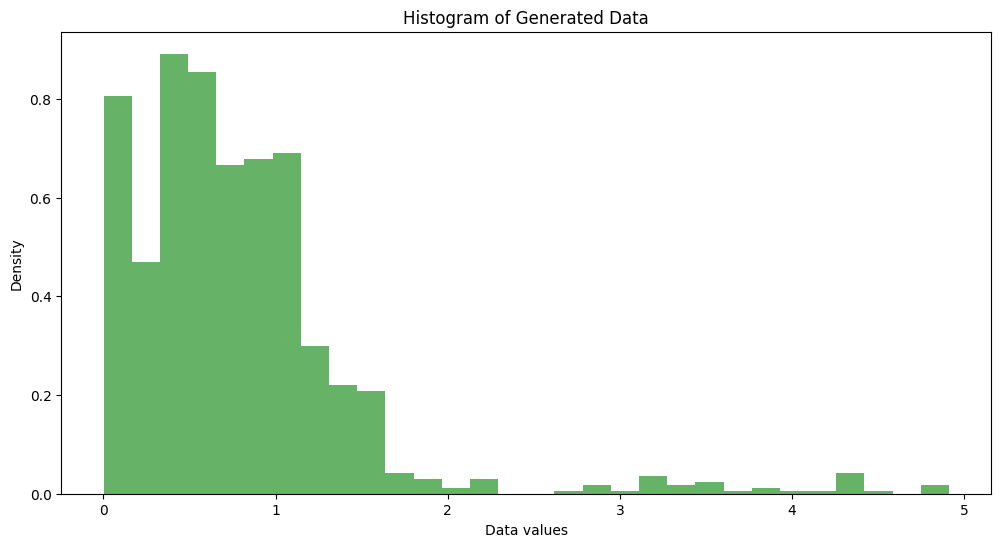

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def target_density(x, theta):
    """ Ziel-Dichtefunktion p_theta(x). """
    if x < 0:
        return 0
    elif x <= 1:
        return 1
    else:
        return 1 / (x ** (2 * (theta + 1)))

def metropolis_hastings(theta, n_samples=1000, burn_in=100):
    """ Metropolis-Hastings Algorithmus zur Erzeugung von Stichproben. """
    samples = [0.5]  # Startwert
    while len(samples) < n_samples + burn_in:
        current_sample = samples[-1]
        proposal = np.random.normal(current_sample, 0.5)  # Normalverteilte Vorschläge
        acceptance_ratio = target_density(proposal, theta) / target_density(current_sample, theta)
        if acceptance_ratio >= 1 or np.random.uniform() < acceptance_ratio:
            samples.append(proposal)
        else:
            samples.append(current_sample)
    return samples[burn_in:]

#Angepasste Funktion zur Datengenerierung
def generate_data(n, theta):
    return metropolis_hastings(theta, n_samples=n)

#Parameters for one case
n = 1000  # Sample size
theta = 1 # True value of theta parameter

#Generate data
data = generate_data(n, theta)

#Plot the generated data
plt.figure(figsize=(12, 6))
plt.hist(data, bins=30, density=True, alpha=0.6, color='g')
plt.title('Histogram of Generated Data')
plt.xlabel('Data values')
plt.ylabel('Density')
plt.show()

In [109]:
B = 1000
alpha =0.5
alpha_values = [0.5, 0.8, 0.9, 0.99]

# Make bootstraps
bootstrap_samples = [np.random.choice(data, size=n, replace=True) for _ in range(B)]

In [110]:
# Calculate quantiles for each bootstrap
bootstrap_quantiles = [np.percentile(q, 100 * alpha) for q in bootstrap_samples]

(array([ 62., 125., 121., 398., 158.,  26.,  69.,  17.,  23.,   1.]),
 array([0.61655325, 0.62882959, 0.64110592, 0.65338226, 0.66565859,
        0.67793493, 0.69021126, 0.7024876 , 0.71476393, 0.72704027,
        0.7393166 ]),
 <BarContainer object of 10 artists>)

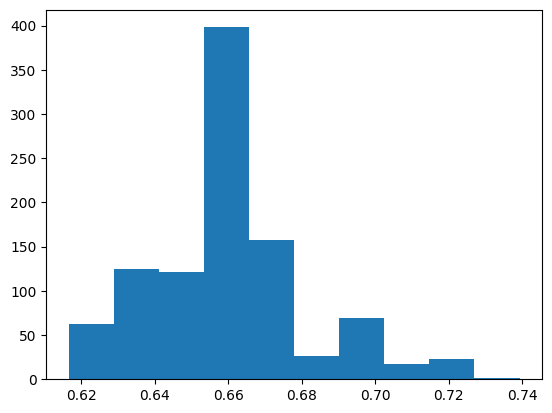

In [111]:
plt.hist(bootstrap_quantiles)

In [124]:
def simulation(iterations, B, n, alpha):
    coverage_count = 0
    interval_lengths = []
    o_quantile = np.percentile(data, 100 * alpha)
    for _ in range(iterations):
        # Make bootstraps
        bootstrap_samples = [np.random.choice(data, size=n, replace=True) for _ in range(B)]
        # Calculate quantiles for each bootstrap
        bootstrap_quantiles = [np.percentile(q, 100 * alpha) for q in bootstrap_samples]
        # Calculate confidence interval
        lower_bound = np.percentile(bootstrap_quantiles, (1 - alpha) / 2 * 100)
        upper_bound = np.percentile(bootstrap_quantiles, (1 + alpha) / 2 * 100)
        # Check for coverage
        if lower_bound <= o_quantile <= upper_bound:
            coverage_count += 1

        # Record the length of the confidence interval
        interval_lengths.append(upper_bound - lower_bound)
    # Calculate coverage probability and average length
    coverage_probability = coverage_count / iterations
    average_length = np.mean(interval_lengths)

    return coverage_probability, average_length    

In [129]:

# Simulation parameters
n_simulations = 1000
n_values = [50, 100]  # Sample sizes to be investigated
B_values = [1000, 5000]  # Number of bootstrap samples
alpha_values = [0.5, 0.8, 0.9, 0.99]  # Significance levels

# Perform the simulation study for different parameter combinations
results = []
for n in n_values:
    for B in B_values:
        for alpha in alpha_values:
            coverage_prob, avg_length = simulation(100, 1000, B, alpha)
            results.append((n, B, alpha, coverage_prob, avg_length))

# Display results
print("n\tB\tAlpha\tCoverage Probability\tAverage Length")
for result in results:
    print(f"{result[0]}\t{result[1]}\t{result[2]}\t{result[3]:.3f}\t{result[4]:.13f}")

n	B	Alpha	Coverage Probability	Average Length
50	1000	0.5	1.000	0.0207628269142
50	1000	0.8	1.000	0.0500929167274
50	1000	0.9	1.000	0.1571894657600
50	1000	0.99	1.000	1.0372368012817
50	5000	0.5	1.000	0.0051056906083
50	5000	0.8	1.000	0.0292750092154
50	5000	0.9	1.000	0.0399644815739
50	5000	0.99	1.000	0.5882131403746
100	1000	0.5	1.000	0.0208998743748
100	1000	0.8	1.000	0.0505769885973
100	1000	0.9	1.000	0.1567965340827
100	1000	0.99	1.000	1.0306131994556
100	5000	0.5	1.000	0.0050977289327
100	5000	0.8	1.000	0.0292049743591
100	5000	0.9	1.000	0.0399632849175
100	5000	0.99	1.000	0.5879796355523


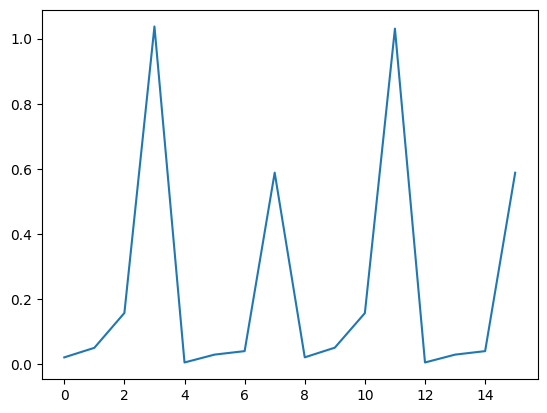

In [142]:
n_x = [i[0] for i in results]
b_x = [i[1] for i in results]
alpha_x = [i[2] for i in results]
cvg_x = [i[3] for i in results]
len_x = [i[4] for i in results]

plt.plot(len_x)

In [150]:
results

[(50, 1000, 0.5, 1.0, 0.020762826914184063),
 (50, 1000, 0.8, 1.0, 0.05009291672736758),
 (50, 1000, 0.9, 1.0, 0.1571894657600168),
 (50, 1000, 0.99, 1.0, 1.0372368012817008),
 (50, 5000, 0.5, 1.0, 0.0051056906083334075),
 (50, 5000, 0.8, 1.0, 0.029275009215447446),
 (50, 5000, 0.9, 1.0, 0.039964481573940766),
 (50, 5000, 0.99, 1.0, 0.5882131403746333),
 (100, 1000, 0.5, 1.0, 0.020899874374830495),
 (100, 1000, 0.8, 1.0, 0.05057698859734048),
 (100, 1000, 0.9, 1.0, 0.15679653408271388),
 (100, 1000, 0.99, 1.0, 1.0306131994556227),
 (100, 5000, 0.5, 1.0, 0.005097728932712381),
 (100, 5000, 0.8, 1.0, 0.02920497435906825),
 (100, 5000, 0.9, 1.0, 0.03996328491749826),
 (100, 5000, 0.99, 1.0, 0.5879796355523478)]

In [116]:
bootstrap_samples = [np.random.choice(data, size=n, replace=True) for _ in range(B)]
# Calculate quantiles for each bootstrap
bootstrap_quantiles = [np.percentile(q, 100 * alpha) for q in bootstrap_samples]
# Calculate confidence interval
lower_bound = np.percentile(bootstrap_quantiles, (1 - alpha) / 2 * 100)
upper_bound = np.percentile(bootstrap_quantiles, (1 + alpha) / 2 * 100)


[array([1.21038999e+00, 6.23954087e-01, 8.94307673e-01, 4.40565389e-01,
        3.58684801e-01, 4.36481578e-01, 1.37000428e+00, 1.49687371e-01,
        1.93347015e+00, 1.90263491e-01, 8.19518107e-01, 4.76790935e-01,
        6.19449983e-01, 4.86961405e-01, 8.43590846e-01, 4.07946552e-01,
        6.02651281e-01, 1.04982858e+00, 1.23442331e+00, 6.00968852e-01,
        3.74674359e-01, 1.28984910e+00, 5.83869379e-01, 6.61935698e-01,
        6.96428267e-01, 1.21622795e+00, 4.91206085e+00, 3.19609420e-02,
        9.25536361e-01, 1.00955158e+00, 2.23870378e-01, 1.51279625e+00,
        2.31798321e-01, 5.13218438e-01, 7.37195176e-01, 3.10123217e-01,
        1.41195209e+00, 5.43750079e-01, 1.34780232e+00, 5.43613844e-01,
        4.32484103e-01, 1.09289546e+00, 8.31432458e-01, 3.94387721e-01,
        4.71946723e-01, 4.06187305e-01, 5.65366278e-01, 1.70998204e+00,
        8.31432458e-01, 3.53369681e-01, 8.36493979e-01, 1.50401629e+00,
        7.39315435e-02, 7.70575942e-01, 6.66599092e-01, 3.016614